# Äpfel und Birnen

Und eine Einführung in Python :)

Wir arbeiten mit Python 3 in Jupyter Notebook. Notebooks erlauben, "live" zu programmieren und die Ergebnisse sofort im Browser zu sehen.

Um den Code in einer Zelle auszuführen, drückt man STEUERUNG + ENTER.

Um eine neue Zelle zu machen drückt man ESCAPE, danach B (für below) oder A (für above).

In dem Code weisen wir der Variable a den Wert 5 zu. Danach lassen wir a auf dem Bildschirm ausgeben. Wir können auch Text auf dem Bildschirm ausgeben, wenn wir ihn in Anführungszeichen setzen.

In [1]:
a = 5
print('Der Wert von a ist:')
print(a)

Der Wert von a ist:
5


In [3]:
# Das ist ein Kommentar
# Zeilen, die kommentiert sind, werden nicht ausgeführt.
# So kann man seinen Code erklären

In [2]:
b = 3
# wenn wir Variablen Werte zugewiesen haben, können wir damit genauso arbeiten, wie auf Papier.
c = a + b
d = a / b
# wir können {} verwenden, um Werte auszugeben. Damit "formattiert" man den String. Hier geben wir den Wert von
# c und d nacheinander aus.
print('c = {} und d = {}'.format(c, d))

c = 8 und d = 1.6666666666666667


In [4]:
# Man beachte, dass a und b ganze Zahlen (integer) waren, aber d durch die Division eine Kommazahl (float) ist!

In [5]:
# Python ist eine Pogrammiersprache und Jupyter eine Programmieroberfläche.
# Python enthält sehr viele Funktionen, die man benutzen muss. Diese sind in Paketen zusammegefasst. Diese Pakete
# kann (und muss) man laden, wenn man Funktionen benutzen muss.
# Wenn man auf Reisen geht, nimmt man auch nicht den gesamten Kleiderschrank mit, sondern trifft eine Auswahl von
# Kleidung, die man für die Situation brauchen wird. So bleibt der Koffer leicht!

# Numpy, um Mathe zu machen
import numpy as np
# Die folgenden Importe sind für Grafiken:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Jetzt können wir mathematische Funktionen aus Numpy benutzen! Diese bekommen immer den Prefix np.
d = np.sqrt(c)
print('Ups, wir haben d überschrieben! Jetzt ist d = {}.'.format(d))

Ups, wir haben d überschrieben! Jetzt ist d = 2.8284271247461903.


In [7]:
# Wenn man den Funktionsnamen nicht raten kann, hilft Gooogle weiter.
# Übung: was ist der 2-er Logarithmus von Wurzel c?

In [8]:
# Wir werden mit Matrizen arbeiten. Eine Matrix ist nichts anderes als ne Liste von Zeilen. Diese werden in numpy
# als ein sogenanntes array gespeichert.
# Wer schon mal mit Matlab gearbeitet hat, kann sich entspannen, denn numpy funktioniert fast genauso.

# Hier haben wir mal die Obst-Werte als array abgespeichert
# in jeder Spalte steht eine der Eigenschaften: Obsttyp, Form, Farbe, Gewicht
# In jeder Zeile ist ein Exemplar

obst = np.array([[0, 200, 0, 0], [1, 220, 2, 1], [1, 180, 2, 1], [0, 200, 1, 0], [0, 210, 0, 0]])

print(obst)

# Bonus: Wie transponiert man diese Matrix?

[[  0 200   0   0]
 [  1 220   2   1]
 [  1 180   2   1]
 [  0 200   1   0]
 [  0 210   0   0]]


In [9]:
# Die Zeilen- und Spaltenbeschriftungen sind wichtig, weshalb wir die gerne mit speichern würden. Data Scientists
# arbeiten viel mit einem speziellen Datenformat: DataFrame, das im Paket pandas enthalten ist.

import pandas as pd
obst = pd.DataFrame([[0, 200, 0, 0], [1, 220, 2, 1], [1, 180, 2, 1], [0, 200, 1, 0], [0, 210, 0, 0]],
                   columns=['type', 'form', 'color', 'weight'])
print(obst)

# Damit können wir (fast) genauso arbeiten, wie mit einer Matrix, aber wir vergessen nie, was was ist!

   type  form  color  weight
0     0   200      0       0
1     1   220      2       1
2     1   180      2       1
3     0   200      1       0
4     0   210      0       0


In [10]:
# Bonus: In dieser Zelle erstellen wir einen künstlichen Datensatz. 
# Wer das nicht nachvollziehen will, kann den Code ausführen und überspringen.

# Wir generieren Zufallsdaten mit den Bedinungen
# 50% der Äpfel sind rot, 20% grün und 30% gelb
# 100% der Äpfel sind rund
# 50% der Birnen sind grün, 50% sind gelb
# 90% der Birnen sind länglich, 10% sind rund
# Sowohl Äpfel als auch Birnen können zwischen 150 und 300 gramm wiegen

# zufallszahl 0 oder 1
typ = np.random.randint(0, 2, size=1000)

# zufallszahl zwishen 150 und 300
gewicht = np.random.randint(150, 300, size=1000)

form = np.random.random(size=1000)
form[np.where(typ==0)] = 0
form[np.where((typ==1)&(form>.9))] = 0
form = form.astype('int')

farbe = np.random.random(size=1000)
farbe[np.where((typ==0)&(farbe<=0.5))]=0
farbe[np.where((typ==0)&(farbe>0.8))]=2
farbe[np.where((typ==1)&(farbe<=0.5))]=2
farbe[np.where((typ==1)&(farbe>0.5))]=1
farbe = farbe.astype('int')

# das Ganze wird als Dataframe gespeichert
obst = pd.DataFrame({'typ': typ, 'form': form, 'farbe': farbe, 'gewicht': gewicht})

In [11]:
# Jetzt können wir uns den Datensatz anschauen

print(obst.head(10))
print()
print(obst.sort_values(by='gewicht').head(10))
print()
print(obst.sort_values(by='gewicht', ascending=False).head(10))

   farbe  form  gewicht  typ
0      2     0      243    0
1      1     0      297    1
2      1     0      223    1
3      0     0      227    0
4      1     0      150    1
5      0     0      274    0
6      1     0      208    1
7      0     0      183    0
8      1     0      256    1
9      1     0      161    1

     farbe  form  gewicht  typ
238      0     0      150    0
4        1     0      150    1
610      2     0      150    0
704      1     0      150    1
151      1     0      150    1
647      0     0      150    0
589      1     0      151    1
540      1     0      151    1
838      1     0      151    1
914      0     0      151    0

     farbe  form  gewicht  typ
537      1     0      299    1
656      0     0      299    0
100      0     0      299    0
553      0     0      299    0
952      1     0      299    1
31       1     0      298    1
998      2     0      298    0
642      0     0      298    0
88       1     0      298    1
70       1     0      298   

In [12]:
# Statistiken über das Obst bekommt man als integrierte Pandas-Funktion
print(obst.describe())

             farbe    form      gewicht          typ
count  1000.000000  1000.0  1000.000000  1000.000000
mean      0.707000     0.0   224.613000     0.503000
std       0.641531     0.0    43.424474     0.500241
min       0.000000     0.0   150.000000     0.000000
25%       0.000000     0.0   187.000000     0.000000
50%       1.000000     0.0   225.000000     1.000000
75%       1.000000     0.0   263.000000     1.000000
max       2.000000     0.0   299.000000     1.000000


In [13]:
# Man muss aber auch nicht immer print benutzen! Ein Vorteil von Jupyter ist, dass die letzte Zeile immer automatisch
# am Bildschirm ausgegeben wird. Dann ist das Format meistens etwas besser.

obst.describe()

,farbe,form,gewicht,typ
count,1000.000000,1000.0,1000.000000,1000.000000
mean,0.707000,0.0,224.613000,0.503000
std,0.641531,0.0,43.424474,0.500241
min,0.000000,0.0,150.000000,0.000000
25%,0.000000,0.0,187.000000,0.000000
50%,1.000000,0.0,225.000000,1.000000
75%,1.000000,0.0,263.000000,1.000000
max,2.000000,0.0,299.000000,1.000000


In [14]:
# Bonus: Wieviele Äpfel sind in dem Datensatz?

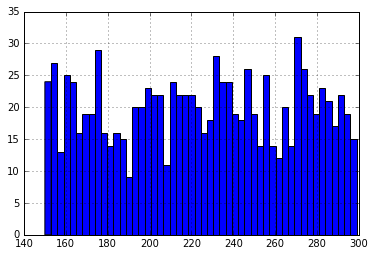

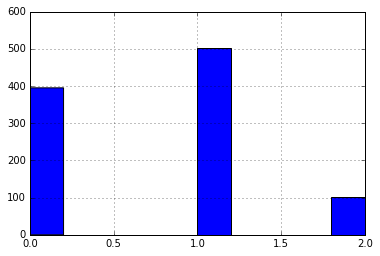

In [19]:
# Daten lassen sich graphisch oft leichter auswerten. Wir plotten ein Histogramm der verschiedenen Werte. Mit Pandas
# geht das ganz einfach durch eine eingebaute Funktion:

obst.gewicht.hist(bins=50)
#neues Bild
plt.figure()
obst.farbe.hist()

# Wir haben die Verteilungen selbst vorgegeben. Passt das?

# Logistische Regression

todo: kurzer Text über Logreg mit Plot

In [20]:
# Wir nehmen die ersten 800 Zeilen aus dem Datensatz als Trainingsdaten. Die letzten 200 Zeilen sind Testdaten, um
# zu überprüfen, um unser Modell was vernünftiges gelernt hat.
X_train = obst[['form', 'farbe', 'gewicht']][0:800]
y_train = obst['typ'][0:800]

X_test = obst[['form', 'farbe', 'gewicht']][800:]
y_test = obst['typ'][800:]

In [21]:
# Es gibt ein Paket namens sklearn, das die meisten üblichen Data Science Modelle bietet. Man kann damit sehr weit
# kommen!
# Wir importieren die Logistische Regression
from sklearn.linear_model import LogisticRegression
# Dann initiieren wir eine Instanz der LogReg
lr = LogisticRegression()
# Diese hat eine funkition fit - wir fitten die LogReg an die Trainingsdaten (bzw. Sklearn und Python machen das für
# uns). Man spricht auch davon, ein Modell auf den Daten zu trainieren. (Deswegen X_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Weil es ein einfaches Modell war und der Datensatz auch nicht sehr groß ist, ging das sehr schnell. Es kann auch schon mal mehrere Tage dauern!

In [28]:
# Nun wollen wir unser Modell testen. Dafür lassen wir unser Modell für den Testdatensatz vorhersagen, ob es sich um
# Äpfel oder Birnen handelt. Das können wir dann mit der richtigen Antwort vergleichen, die in y_test gespeichert ist.

prediction = lr.predict(X_test)
print(prediction)
print()
print(y_test.values)

[1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0]

[0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0]


In [ ]:
# Wie können wir entscheiden, ob es sich um ein gutes oder schlechtes Modell handelt?

In [30]:
# Das Modell gibt uns nicht nur eine Vorhersage, ob es sich um einen Apfel oder eine Birne handelt, sondern auch
# wie sicher es sich ist. So

p_birne = lr.predict_proba(X_test)[:,1]
print(p_birne)

[0.91641524 0.21273952 0.63895828 0.26404196 0.21837753 0.26242526
 0.26081495 0.25024411 0.25128824 0.91555992 0.59433013 0.59566931
 0.66294269 0.59030422 0.89144873 0.67524603 0.6746364  0.27609122
 0.5876135  0.89036849 0.92158468 0.58963204 0.62082291 0.65733206
 0.62278325 0.26350235 0.64087909 0.67219197 0.20538857 0.25443795
 0.62604154 0.90749799 0.67828525 0.67949674 0.21743043 0.91768346
 0.59633837 0.27609122 0.68010159 0.63574705 0.65419581 0.67949674
 0.21088395 0.91726268 0.23794137 0.6788913  0.60964136 0.631231
 0.6776786  0.26296345 0.2539112  0.22509028 0.23743789 0.6427954
 0.58694    0.90796345 0.65230758 0.64914989 0.62473957 0.6427954
 0.21042192 0.26838427 0.21042192 0.26620747 0.62604154 0.65795768
 0.63767526 0.20675238 0.23945621 0.64215713 0.21134673 0.6030089
 0.21227451 0.22801163 0.62993643 0.61885863 0.92098015 0.62863998
 0.64724897 0.27553621 0.8943713  0.2314535  0.6030089  0.67219197
 0.26838427 0.61623352 0.59164756 0.61820299 0.59767542 0.26296345


In [48]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print('True positives: \t{}\nTrue negatives: \t{}\nFalse positives: \t{}\nFalse negatives:\t{}'.format(tp, tn, fp, fn))

True positives: 	100
true negatives: 	78
false positives: 	22
false negatives:	0


Wir können sehr viele verschiedene Methoden der Auswertung finden, aber wir müssen trotzdem selbst entscheiden, ob das Modell gut genug ist!